WindowSize=5, 600epochs 

In [2]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
print(tf.version.VERSION)

2.10.0


In [10]:
#columns = ["mic1", "mic2", "mic3", "mic4", "mic5", "angle"]

In [11]:
df = pd.read_csv("C:/Users/hank4/Documents/CEN598-Final-Project/CEN598-servo-rotation-data-collection/Dataset/raw_combined_data.csv")

In [12]:
df.head(6)

,mic1,mic2,mic3,mic4,mic5,angle
0,18.03,19.49,15.27,16.39,17.49,0
1,17.69,19.00,14.98,16.06,17.09,0
2,17.49,18.61,14.62,15.85,16.78,0
3,17.31,18.20,14.40,15.61,16.52,0
4,16.99,17.76,14.28,15.30,16.09,0
5,16.68,17.44,14.17,15.13,15.60,0


In [13]:
window_size = 5
no_of_rows = int(len(df)/window_size)
rows, cols = (no_of_rows, window_size)
mic1_window = [[0 for i in range(cols)] for j in range(rows)]
mic2_window = [[0 for i in range(cols)] for j in range(rows)]
mic3_window = [[0 for i in range(cols)] for j in range(rows)]
mic4_window = [[0 for i in range(cols)] for j in range(rows)]
mic5_window = [[0 for i in range(cols)] for j in range(rows)]
concatenated_window = [[0 for i in range((cols*5)+1)] for j in range(rows)]
np.shape(concatenated_window)

(28000, 26)

In [14]:
df['angle'] = df['angle'].map({'0':0, '36':1, '72':2, '108':3, '144':4, '180':5, 'silence':6})

In [15]:
df['angle'][0]

0

In [16]:
k=-1
for i in range(0, no_of_rows):
    angle = 0
    for j in range(0, window_size):
        k=k+1
        mic1_window[i][j] = df["mic1"][k]
        mic2_window[i][j] = df["mic2"][k]
        mic3_window[i][j] = df["mic3"][k]
        mic4_window[i][j] = df["mic4"][k]
        mic5_window[i][j] = df["mic5"][k]
        concatenated_window[i][j] = mic1_window[i][j]
        concatenated_window[i][j+(window_size*1)] = mic2_window[i][j]
        concatenated_window[i][j+(window_size*2)] = mic3_window[i][j]
        concatenated_window[i][j+(window_size*3)] = mic4_window[i][j]
        concatenated_window[i][j+(window_size*4)] = mic5_window[i][j]
        angle = angle+df["angle"][k]
        #print(df["angle"][k])
    concatenated_window[i][j+(window_size*4)+1] = angle/window_size
#print(mic1_window)
#print(concatenated_window)

In [17]:
len(concatenated_window)

28000

In [18]:
i=1
j=1
"mic"+str(i)+"-"+str(j)

'mic1-1'

In [19]:
no_of_mics = 5
columns = []
for i in range(1, no_of_mics+1):
    for j in range(1, cols+1):
        columns.append("mic"+str(i)+"-"+str(j)) 
columns.append("angle")
print(columns)

['mic1-1', 'mic1-2', 'mic1-3', 'mic1-4', 'mic1-5', 'mic2-1', 'mic2-2', 'mic2-3', 'mic2-4', 'mic2-5', 'mic3-1', 'mic3-2', 'mic3-3', 'mic3-4', 'mic3-5', 'mic4-1', 'mic4-2', 'mic4-3', 'mic4-4', 'mic4-5', 'mic5-1', 'mic5-2', 'mic5-3', 'mic5-4', 'mic5-5', 'angle']


In [20]:
df = pd.DataFrame(concatenated_window, columns=columns)

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mic1-1,28000.0,22.543157,5.351183,12.29,18.8700,22.140,25.6600,55.70
mic1-2,28000.0,22.541234,5.351301,12.27,18.8675,22.150,25.6200,57.46
mic1-3,28000.0,22.540370,5.350329,12.25,18.8800,22.180,25.6225,57.71
mic1-4,28000.0,22.541517,5.350336,12.24,18.8800,22.140,25.6400,56.81
mic1-5,28000.0,22.542809,5.350492,12.19,18.8900,22.140,25.6600,56.00
mic2-1,28000.0,24.678552,6.787049,11.48,19.7700,23.770,28.3400,70.90
mic2-2,28000.0,24.676283,6.786920,11.49,19.7100,23.780,28.3400,73.00
mic2-3,28000.0,24.674641,6.785523,11.49,19.7300,23.770,28.3300,73.28
mic2-4,28000.0,24.676320,6.785383,11.64,19.7375,23.770,28.3300,71.68
mic2-5,28000.0,24.677734,6.784958,11.55,19.7600,23.780,28.3500,70.63


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
X = df.drop('angle',axis=1).values
y = df['angle'].values

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
y_cat_train = to_categorical(y_train,7)

In [27]:
y_cat_test = to_categorical(y_test,7)

In [28]:
#from sklearn.preprocessing import MinMaxScaler

In [29]:
#scaler = MinMaxScaler()

In [30]:
#scaler.fit(X_train)

In [31]:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [32]:
'''print("min: ",scaler.min_)
print("scale: ",scaler.scale_)
print("data_min: ",scaler.data_min_)
print("data_max: ",scaler.data_max_)
print("n_features_in: ",scaler.n_features_in_)'''

'print("min: ",scaler.min_)\nprint("scale: ",scaler.scale_)\nprint("data_min: ",scaler.data_min_)\nprint("data_max: ",scaler.data_max_)\nprint("n_features_in: ",scaler.n_features_in_)'

In [33]:
X_train = X_train/1023.0
X_test = X_test/1023.0

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [35]:
X_train.shape

(22400, 25)

In [36]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))

model.add(Dense(units=7,activation='softmax'))

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x=X_train, 
          y=y_cat_train, 
          epochs=600,
          batch_size = 1024,
          validation_data=(X_test, y_cat_test), verbose=1
          )

Epoch 1/600
22/22 [==============================] - 1s 10ms/step - loss: 1.9454 - accuracy: 0.1488 - val_loss: 1.9447 - val_accuracy: 0.1366
Epoch 2/600
22/22 [==============================] - 0s 3ms/step - loss: 1.9434 - accuracy: 0.1444 - val_loss: 1.9420 - val_accuracy: 0.1366
Epoch 3/600
22/22 [==============================] - 0s 3ms/step - loss: 1.9394 - accuracy: 0.1370 - val_loss: 1.9353 - val_accuracy: 0.1612
Epoch 4/600
22/22 [==============================] - 0s 3ms/step - loss: 1.9291 - accuracy: 0.1942 - val_loss: 1.9191 - val_accuracy: 0.2796
Epoch 5/600
22/22 [==============================] - 0s 3ms/step - loss: 1.9084 - accuracy: 0.2853 - val_loss: 1.8899 - val_accuracy: 0.2900
Epoch 6/600
22/22 [==============================] - 0s 3ms/step - loss: 1.8746 - accuracy: 0.2732 - val_loss: 1.8473 - val_accuracy: 0.2814
Epoch 7/600
22/22 [==============================] - 0s 3ms/step - loss: 1.8309 - accuracy: 0.2702 - val_loss: 1.7968 - val_accuracy: 0.2759
Epoch 8/600


In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.945365,0.148795,1.944656,0.136607
1,1.943380,0.144420,1.941978,0.136607
2,1.939416,0.137009,1.935302,0.161250
3,1.929062,0.194196,1.919132,0.279643
4,1.908387,0.285268,1.889861,0.290000
...,...,...,...,...
595,0.669882,0.726652,0.663250,0.730179
596,0.670594,0.727054,0.663945,0.726786
597,0.671932,0.725759,0.665050,0.726250
598,0.670764,0.727366,0.662843,0.729286


<Axes: >

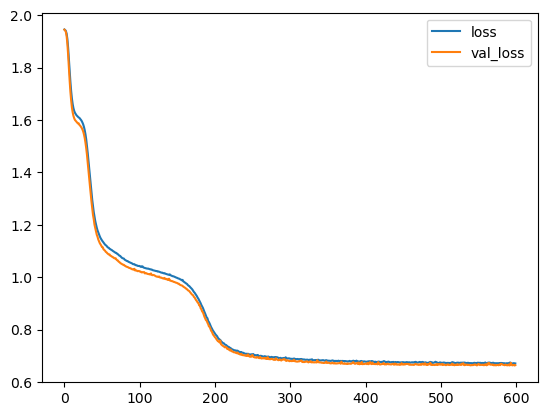

In [40]:
# loss --> Training loss, val_loss--> Test data loss
losses[['loss','val_loss']].plot()

<Axes: >

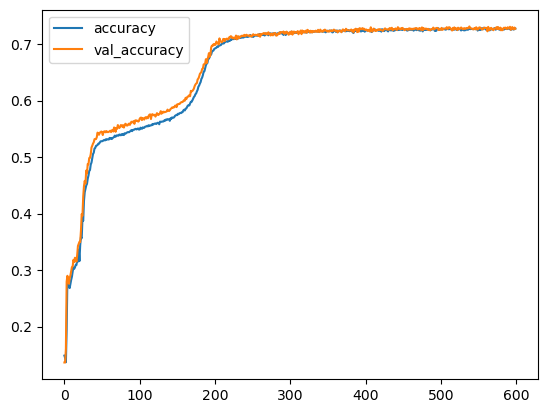

In [41]:
# acc --> accuracy of training data, val_acc --> accuracy of test data
losses[['accuracy','val_accuracy']].plot()

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions = model.predict(X_test)

175/175 [==============================] - 0s 688us/step


In [44]:
#print(list(predictions))

In [45]:
predictions = map(lambda x: np.argmax(x), predictions)
predictions = list(predictions)
#print(predictions)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       808
         1.0       0.67      0.63      0.65       765
         2.0       0.52      0.61      0.56       770
         3.0       0.72      0.62      0.67       848
         4.0       0.69      0.71      0.70       789
         5.0       0.79      0.80      0.79       779
         6.0       0.98      0.95      0.96       841

    accuracy                           0.73      5600
   macro avg       0.73      0.73      0.73      5600
weighted avg       0.73      0.73      0.73      5600



In [47]:
#list(predictions)

In [48]:
confusion_matrix(y_test,predictions)

array([[617, 101,  31,   6,  12,  33,   8],
       [118, 484, 148,   6,   6,   2,   1],
       [ 43, 122, 467, 111,  15,   7,   5],
       [  5,  10, 200, 527,  98,   5,   3],
       [  9,   1,  20,  79, 558, 122,   0],
       [ 28,   1,   5,   6, 118, 621,   0],
       [ 10,   2,  28,   1,   0,   1, 799]], dtype=int64)

In [49]:
model.save("classification_model_20000_model1_input5_600.h5")

In [50]:
from tensorflow.keras.models import load_model
model1 = load_model("classification_model_20000_model1_input5_600.h5")

In [51]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model1) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('classification_model_20000_model1_input5_600.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hank4\AppData\Local\Temp\tmpa3tbu0ux\assets


In [52]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="classification_model_20000_model1_input5_600.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
tflite_output_data = []

for i in range(len(X_test)):
    input_data = np.array(np.expand_dims(X_test[i], axis=0), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    
    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    tflite_output_data.append(output_data)
#print(tflite_output_data)

In [53]:
tflite_predictions = map(lambda x: np.argmax(x), tflite_output_data)
tf_lite_predictions = list(tflite_predictions)
#print(tf_lite_predictions)

In [54]:
confusion_matrix(y_test,tf_lite_predictions)

array([[617, 101,  31,   6,  12,  33,   8],
       [118, 484, 148,   6,   6,   2,   1],
       [ 43, 122, 467, 111,  15,   7,   5],
       [  5,  10, 200, 527,  98,   5,   3],
       [  9,   1,  20,  79, 558, 122,   0],
       [ 28,   1,   5,   6, 118, 621,   0],
       [ 10,   2,  28,   1,   0,   1, 799]], dtype=int64)